# Stack Exchange Politics Subforum Analysis

## Overview
This project demonstrates the use of **Scrapy** for web scraping and **Python** for data analysis. The focus is on the **Politics subforum** of Stack Exchange, a popular Q&A platform, where data about questions, users, and tags is extracted and analyzed.

### Objectives
1. **Data Collection**: Scrape questions, user details, and tags from the Politics subforum using Scrapy.
2. **Data Cleaning**: Process and clean the scraped data to prepare it for analysis.
3. **Exploratory Data Analysis (EDA)**: Analyze trends in user activity, tag popularity, and engagement over time.
4. **Statistical Analysis**: Explore relationships between user activities (e.g., questions, comments) and reputation using correlations and regression modeling.

## Project Workflow
The project follows these steps:
1. **Setting Up the Environment**: Preparing tools and libraries for scraping and analysis.
2. **Scraping the Data**: Using a Scrapy spider to extract structured data from the Politics subforum.
3. **Data Cleaning**: Processing raw data to ensure it’s clean and ready for analysis.
4. **Data Analysis**:
   - **Tag Analysis**: Identifying and visualizing the most common tags and their trends.
   - **User Engagement**: Highlighting the most active users and their contributions.
   - **Statistical Insights**: Using correlations and regression analysis to understand user behavior and reputation.

## Instructions for Setting Up and Running the Scrapy Spider

### 1. Setting Up the Environment
1. **Creating a Virtual Environment in Anaconda Navigator**:
   - Open **Anaconda Navigator** and navigate to the **Environments** section.
   - Create a new environment and select the latest version of Python.

2. **Adding Required Libraries**:
   - Add libraries such as Scrapy, Pandas, and others needed for the project.

3. **Launching Tools**:
   - Activate the environment in Anaconda Navigator and launch:
     - **Anaconda Prompt**: For running Scrapy commands.
     - **Spyder IDE**: For writing and editing Python scripts.
     - **Jupyter Notebook**: For analyzing and visualizing the data post-scraping.

4. **Creating the Scrapy Project:**
  - In Anaconda Prompt, navigating to the desired directory.
  - Creating the Scrapy project with:
    ```
    scrapy startproject StackExPolitics
    ```

5. **Creating and Configuring the Spider:**
  - Inside the project directory, create the spider, `StackExPoliticsSpider`:
    ```
    scrapy genspider StackExPoliticsSpider http://127.0.0.1:8080/politics.stackexchange.com_en_all_2023-11/questions
    ```
  - Define the required data fields in `items.py` as follows: 
    
    ```
    class StackExPoliticsItem(scrapy.Item):
    title = scrapy.Field()
    question_link = scrapy.Field()
    tags = scrapy.Field()
    votes = scrapy.Field()
    answers_count = scrapy.Field()
    comments_count = scrapy.Field()     
    excerpt = scrapy.Field()
    asked_time = scrapy.Field()
    user_name = scrapy.Field()
    user_profile_link = scrapy.Field()
    user_reputation = scrapy.Field()
    user_gold_badges = scrapy.Field()
    user_silver_badges = scrapy.Field()
    user_bronze_badges = scrapy.Field()
    ```
 
  - In Spyder,when we open the `StackExPoliticsSpider.py` file, we'll find a default spider structure. Modify the allowed_domains and start_urls to match the domain and URL of your target site and then write the spider logic in`StackExPoliticsSpider.py`as follows:
   
    ```
    class StackExPoliticsSpider(scrapy.Spider):
    name = "StackExPoliticsSpider"
    allowed_domains = ["127.0.0.1"]
    start_urls = ["http://127.0.0.1:8080/politics.stackexchange.com_en_all_2023-11/questions"]

    def parse(self, response):
        #Scraping the list of questions on the page
        questions = response.css("div.question-summary")
        for question in questions:
            question_link = question.css('h3 a.question-hyperlink::attr(href)').get()
            if question_link:
                yield response.follow(question_link,self.parse_question,meta={'question': question})

        #Scraping all pages
        next_page = response.css('a[rel="next"]::attr(href)').get()
        if next_page:
            yield response.follow(next_page,self.parse)

    def parse_question(self, response):
        question = response.meta['question']
        loader = ItemLoader(item=StackExPoliticsItem(),selector=question)

        #Scraping fields from the question
        loader.add_css('title','h3 a.question-hyperlink::text')
        loader.add_css('question_link','h3 a.question-hyperlink::attr(href)')
        loader.add_css('excerpt','.excerpt::text')
        loader.add_css('tags','div.tags a.post-tag::text')
        loader.add_css('asked_time','.s-user-card--time::attr(datetime)')
        loader.add_css('user_name','.s-user-card--link::text')
        loader.add_css('user_profile_link','.s-user-card--avatar::attr(href)')
        loader.add_css('user_reputation','.s-user-card--rep::text')
        loader.add_css('user_gold_badges','.s-award-bling__gold::text')
        loader.add_css('user_silver_badges','.s-award-bling__silver::text')
        loader.add_css('user_bronze_badges','.s-award-bling__bronze::text')
        loader.add_css('votes','.vote-count-post strong::text')
        loader.add_css('answers_count','.status strong::text')

        #Counting comments
        comments = response.css('.comment.js-comment').getall()
        loader.add_value('comments_count',len(comments))

        yield loader.load_item()
    ```

6. **Running the Spider and Collecting Data:**
  - Navigating to the project directory in Anaconda Prompt.
  - Running the spider and turning output data to a CSV file:
    
    ```
    scrapy crawl StackExPoliticsSpider -o stackexpoliticdata.csv
    ```

## Data Preparation

After collecting the data using Scrapy, the next step is to load it into a pandas DataFrame and clean it for analysis. This involves:
1. Importing the data into a DataFrame.
2. Handling missing values.
3. Cleaning and converting data types.
4. Splitting and extracting date and time information for detailed analysis.

These steps ensure the dataset is ready for exploratory data analysis (EDA) and statistical modeling.

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
#Load the dataset
file_path= 'stackexpoliticdata.csv'
data = pd.read_csv(file_path)
#Preview of data
print(data.head())
#Checking the missing values
print(data.isnull().sum())
#Checking data types and memory usage
print(data.info())

   answers_count                 asked_time comments_count  \
0             15  asked Feb 22 '19 at 10:17           [86]   
1             11  asked Aug 05 '20 at 01:47           [24]   
2             15  asked Sep 04 '18 at 15:41           [44]   
3             19  asked Sep 12 '18 at 14:43           [84]   
4              6  asked Sep 30 '20 at 01:20           [38]   

                                             excerpt  \
0  As a German I really don't get calling Bernie ...   
1  Given the recent political upheaval and mass p...   
2  I am wondering about developed countries in ge...   
3  Any European cities I have ever visited had ho...   
4  I was watching the Biden/Trump Presidential de...   

                                       question_link  \
0  ./questions/38967/why-is-it-that-bernie-sander...   
1  ./questions/56078/why-is-it-considered-racist-...   
2  ./questions/33396/why-does-religion-get-a-spec...   
3  ./questions/33612/why-do-european-cities-have-...   
4  ./quest

In [3]:
#Cleaning the dataset
#Converting user_reputation to integer after removing commas
data['user_reputation'] = data['user_reputation'].str.replace(',','').astype(float)

# Cleaning comments_count and convert to integer
data['comments_count'] = data['comments_count'].str.strip('[]').astype(int)

# Converting asked_time to datetime and extracting the year and seprating the time and the date to two columns
data['asked_time'] = pd.to_datetime(data['asked_time'].str.replace('asked ', ''),format='%b %d \'%y at %H:%M')
data['year']= data['asked_time'].dt.year
data['date'] = data['asked_time'].dt.date
data['time'] = data['asked_time'].dt.time

# Filling missing numeric values with 0 and converting these columns to integer
numeric_columns = ['user_bronze_badges','user_gold_badges','user_silver_badges']
data[numeric_columns]=data[numeric_columns].fillna(0)
data[numeric_columns] = data[numeric_columns].astype(int)

#Check
print(data.head())
print(data.info())

   answers_count          asked_time  comments_count  \
0             15 2019-02-22 10:17:00              86   
1             11 2020-08-05 01:47:00              24   
2             15 2018-09-04 15:41:00              44   
3             19 2018-09-12 14:43:00              84   
4              6 2020-09-30 01:20:00              38   

                                             excerpt  \
0  As a German I really don't get calling Bernie ...   
1  Given the recent political upheaval and mass p...   
2  I am wondering about developed countries in ge...   
3  Any European cities I have ever visited had ho...   
4  I was watching the Biden/Trump Presidential de...   

                                       question_link  \
0  ./questions/38967/why-is-it-that-bernie-sander...   
1  ./questions/56078/why-is-it-considered-racist-...   
2  ./questions/33396/why-does-religion-get-a-spec...   
3  ./questions/33612/why-do-european-cities-have-...   
4  ./questions/57628/why-don-t-presidential-de

## Tag Frequencies Function

Tags in the dataset represent topics associated with each question. Analyzing their frequencies helps identify the most common topics and their relative importance in the subforum. This function takes a list of tags as input, counts how often they appear, and visualizes the results using a bar graph.

Steps:
- The `tags` column, which contains multiple tags separated by commas, is split into individual tags for analysis.
- The frequency of each tag is calculated by counting its occurrences across all questions.
- A list of specific tags can be provided to filter and focus the analysis.
- A bar graph is generated to show the frequency of the selected tags, providing a clear visual representation of their usage.

The function is applied to visualize the frequencies of selected tags such as `united-states`, `ukraine`, `taxes`, `israel`, and `social-welfare`. The bar graph highlights how often these tags are used within the dataset.



In [4]:
#Spliting the tags into individual tags
all_tags = data['tags'].str.split(',', expand=True)

#Counting occurrences of each tag
tag_counts = all_tags.stack().value_counts()
tag_counts

united-states           708
united-kingdom          154
russian-federation      127
donald-trump             97
president                89
                       ... 
somalia                   1
somaliland                1
united-arab-emirates      1
czech-republic            1
macedonia                 1
Length: 522, dtype: int64

In [5]:
def tag_frequencies(tags_list):
    #Filtering the counts for the tags in the list
    selected_tag_counts = tag_counts[tag_counts.index.isin(tags_list)]

    #Plotting a bar graph
    plt.figure(figsize=(10,5))
    sns.barplot(x=selected_tag_counts.index,y=selected_tag_counts.values)
    plt.title('Frequency of Selected Tags')
    plt.xlabel('Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=40)
    plt.show()

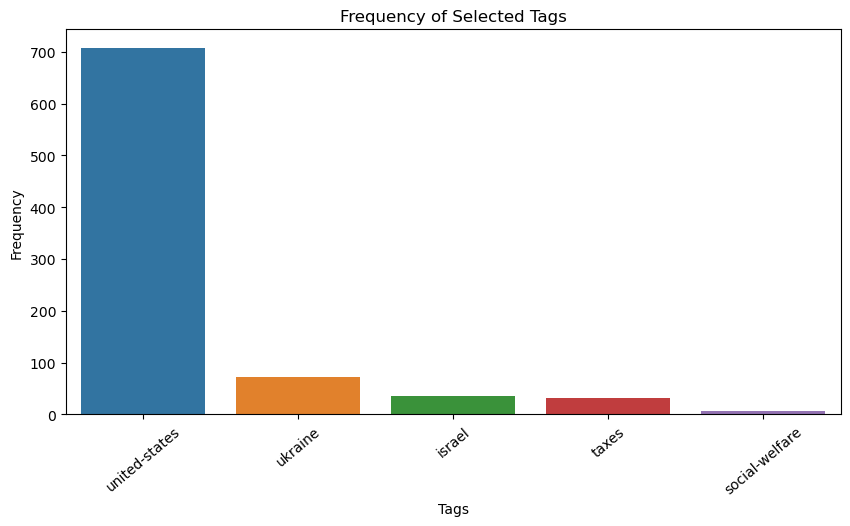

In [6]:
tags_to_plot= ['united-states','ukraine','taxes','israel','social-welfare']
tag_frequencies(tags_to_plot)


## Visualizing Most Common Tags

To understand engagement trends over time, this section analyzes the top five most frequently used tags in the dataset. By tracking how the number of questions associated with these tags changes yearly, we can observe shifts in user interest and focus.

Steps:
- The top five tags are identified based on their overall frequency in the dataset.
- For each tag, the number of questions associated with it is calculated for every year.
- Missing data (years with no questions for a tag) is filled with `0` to maintain consistency.
- A line plot is used to show trends in the number of questions for each tag over time.
- A heatmap provides a detailed view of the yearly distribution, highlighting variations in tag popularity across different years.

These visualizations allow us to observe which topics have remained consistently popular and which have experienced significant changes in engagement.

In [7]:
#Getting the top five tags
top_five_tags = tag_counts.head(5).index.tolist()
top_five_tags

['united-states',
 'united-kingdom',
 'russian-federation',
 'donald-trump',
 'president']

In [8]:
#Initializing a DataFrame to store counts per year for each tag
tag_over_year = pd.DataFrame(index=sorted(data['year'].unique()))

for tag in top_five_tags:
    # Filter the dataset for each tag and count occurrences by year
    tag_data = data[data['tags'].str.contains(tag)]
    tag_counts_per_year = tag_data.groupby('year').size()
    tag_over_year[tag] = tag_counts_per_year

#Filling Na values with 0, as years with no questions should count as 0
tag_over_year = tag_over_year.fillna(0)


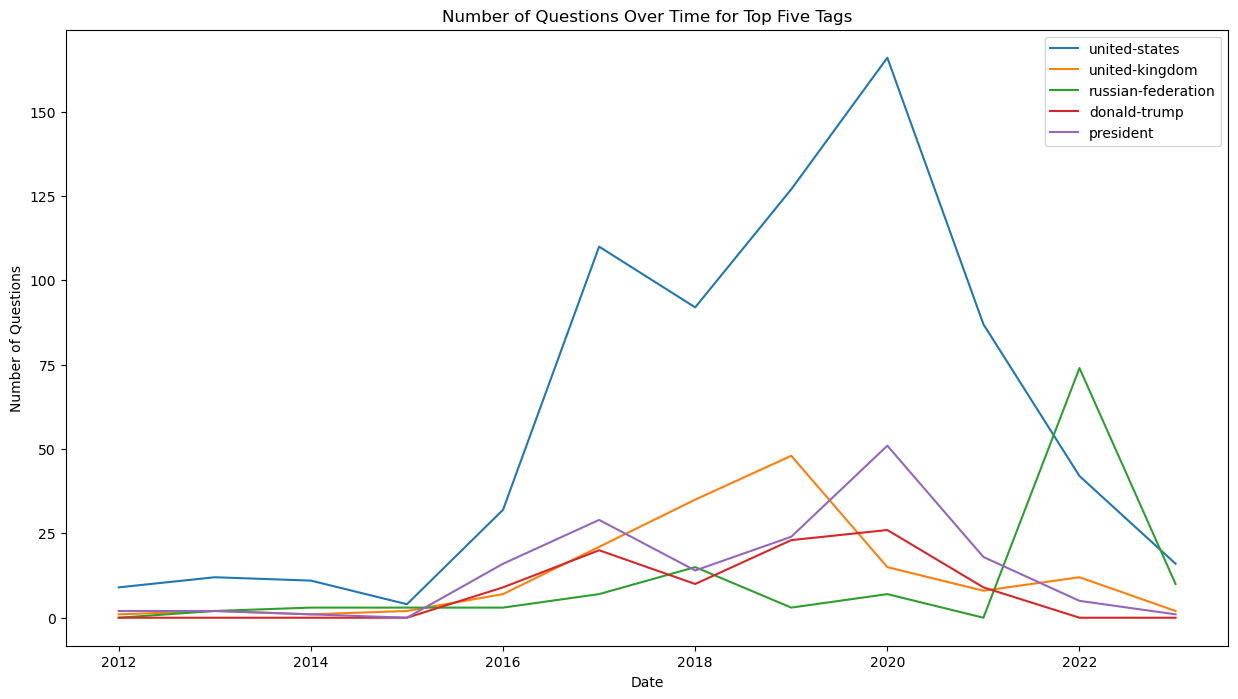

In [9]:
#Plotting using line plot
plt.figure(figsize=(15, 8))
for tag in top_five_tags:
    plt.plot(tag_over_year.index, tag_over_year[tag], label=tag)

plt.title('Number of Questions Over Time for Top Five Tags')
plt.xlabel('Date')
plt.ylabel('Number of Questions')
plt.legend()
plt.show()


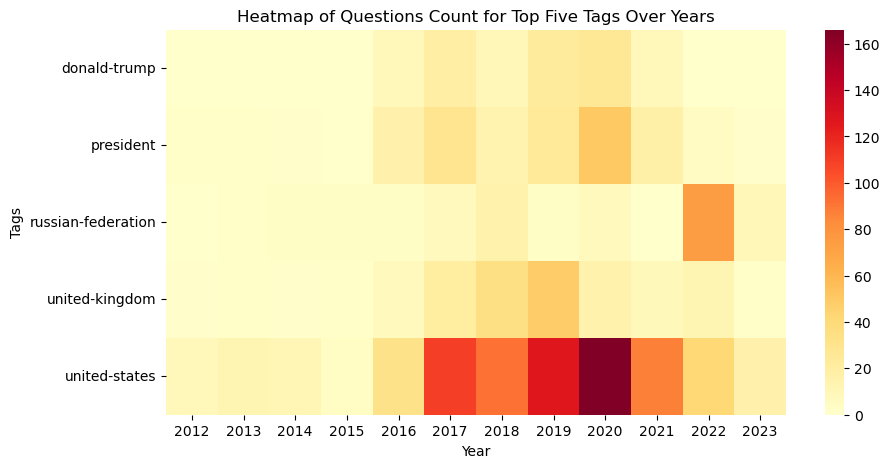

In [10]:
#Melting the data for a heatmap
heatmap_data = tag_over_year.reset_index().melt(id_vars=['index'],value_vars=top_five_tags,var_name='Tag',value_name='Questions')

#Creating the heatmap 
plt.figure(figsize=(10,5))
pivot_table = heatmap_data.pivot(index='Tag',columns='index',values='Questions')
sns.heatmap(pivot_table, cmap='YlOrRd')

plt.title('Heatmap of Questions Count for Top Five Tags Over Years')
plt.xlabel('Year')
plt.ylabel('Tags')
plt.show()


## Super User Function

The `super_user` function is designed to identify the most active users in the Stack Exchange dataset based on their engagement. It provides insights into user behavior by filtering data by specific tags and activity types.

The function works as follows:
- Accepts two inputs: a specific `tag` and an activity `type` (question, answer, or comment).
- Filters the dataset to include only data associated with the specified tag. If `tag = 'all'`, no filtering is applied.
- Determines the user with the most engagement based on the selected activity type:
  - `question`: User who asked the most questions.
  - `answer`: User who posted the most answers.
  - `comment`: User who wrote the most comments.
- Returns the username of the most active user in the specified category.

This allows for granular analysis of user activity within specific tags or across the entire dataset.

In [11]:
#Defining Super_user function
def super_user(tag,type):
    #Filtering data for the specified tag,if not 'all'
    if tag != 'all':
        filtered_data = data[data['tags'].str.contains(tag)]
    else:
        filtered_data = data

    #Depending on the type, find the user with the most questions, answers, or comments
    if type == 'question':
        top_user = filtered_data['user_name'].value_counts().idxmax()
    elif type == 'answer':
        top_user = filtered_data.groupby('user_name')['answers_count'].sum().idxmax()
    elif type == 'comment':
        top_user = filtered_data.groupby('user_name')['comments_count'].sum().idxmax()
    else:
        return "Invalid type"

    return top_user


In [12]:
# Test with a specific tag and type
tag ='taxes'
type ='comment'
result = super_user(tag, type)
print(f"Top user for {type} in tag '{tag}': {result}")

#Testing with all tags and different types
all_tags ='all'
types =['question','answer','comment']
for type in types:
    result = super_user(all_tags,type)
    print(f"Top user for {type} in all tags: {result}")


Top user for comment in tag 'taxes': gerrit
Top user for question in all tags: JonathanReez
Top user for answer in all tags: JonathanReez
Top user for comment in all tags: JonathanReez


## Correlation Analysis

To explore the relationships between user reputation and their activity on Stack Exchange, we analyzed three key metrics: the number of questions posted, answers posted, and comments posted. Scatterplots were created to visualize these relationships, and correlation coefficients were calculated to quantify the strength of these relationships.

### Steps
- **Data Aggregation**:
  - User activity data is grouped by username and aggregated for:
    - Questions posted (`questions_posted`).
    - Answers posted (`answers_posted`).
    - Comments posted (`comments_posted`).
  - Average user reputation is also calculated.
- **Scatterplots**:
  - Scatterplots display user reputation against each activity metric.
  - A linear fit line is added to each plot to highlight the trend.
- **Correlation Coefficients**:
  - Pearson correlation coefficients are calculated for:
    - Questions posted vs. user reputation.
    - Answers posted vs. user reputation.
    - Comments posted vs. user reputation.
  - These values help quantify the strength and direction of the relationships.

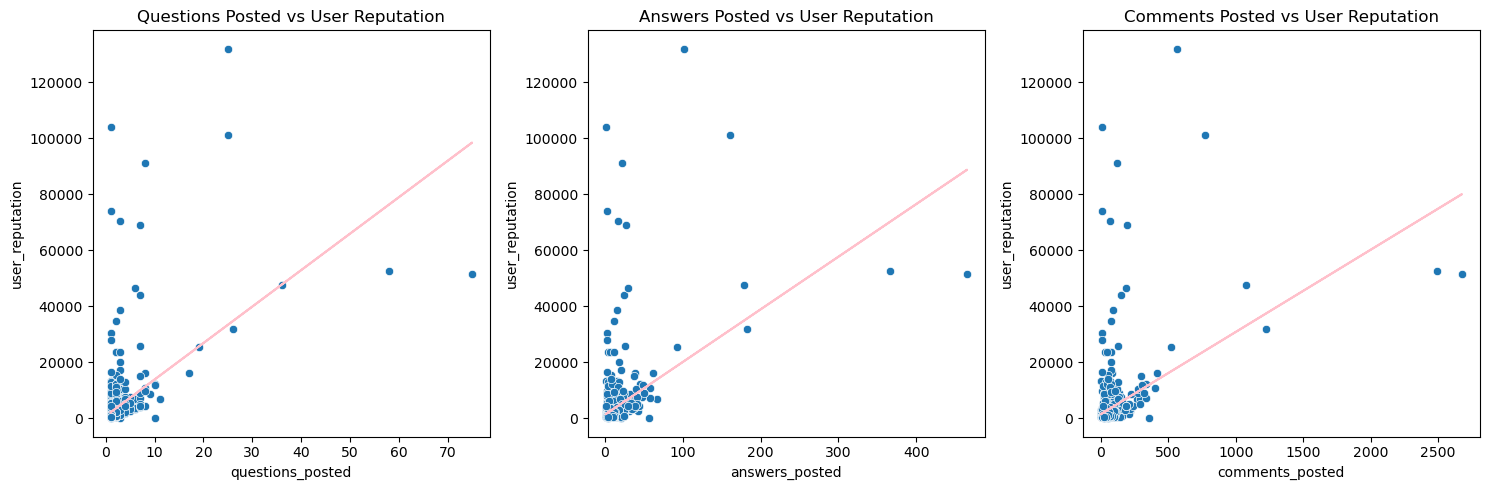

In [13]:
#Grouping data by user and aggregating
user_data= data.groupby('user_name').agg({'title':'count',
                                          'answers_count':'sum', 
                                          'comments_count':'sum',
                                          'user_reputation':'mean'})

#Renaming columns for clarity
user_data.rename(columns={'title':'questions_posted', 
                          'answers_count':'answers_posted', 
                          'comments_count':'comments_posted'}, inplace=True)

#Plotting the correlations
#Defining function to plotlinear fit line
def fit_line(ax,x,y):
    m,b =np.polyfit(x,y,1)#Linear fit slope and intercept
    ax.plot(x,m*x+b,color='pink')

fig,axs =plt.subplots(1,3,figsize=(15,5))

#Questions vs Reputation
sns.scatterplot(data=user_data,x='questions_posted', y='user_reputation' ,ax=axs[0])
fit_line(axs[0],user_data['questions_posted'],user_data['user_reputation'])
axs[0].set_title('Questions Posted vs User Reputation')

#Answers vs Reputation
sns.scatterplot(data=user_data,x='answers_posted',y='user_reputation',ax=axs[1])
fit_line(axs[1],user_data['answers_posted'], user_data['user_reputation'])
axs[1].set_title('Answers Posted vs User Reputation')

#Comments vs Reputation
sns.scatterplot(data=user_data,x='comments_posted',y='user_reputation',ax=axs[2])
fit_line(axs[2], user_data['comments_posted'], user_data['user_reputation'])
axs[2].set_title('Comments Posted vs User Reputation')

plt.tight_layout()
plt.show()


In [14]:
#Calculating correlations
correlation_questions=user_data['questions_posted'].corr(user_data['user_reputation'])
correlation_answers=user_data['answers_posted'].corr(user_data['user_reputation'])
correlation_comments=user_data['comments_posted'].corr(user_data['user_reputation'])

print(f'Correlation between Questions Posted and User Reputation:{correlation_questions:.2f}')
print(f'Correlation between Answers Posted and User Reputation: {correlation_answers:.2f}')
print(f"Correlation between Comments Posted and User Reputation: {correlation_comments:.2f}")


Correlation between Questions Posted and User Reputation:0.53
Correlation between Answers Posted and User Reputation: 0.46
Correlation between Comments Posted and User Reputation: 0.44


These results suggest that while all three activities contribute to user reputation, posting questions has the strongest relationship with reputation among the metrics analyzed.

## OLS Regression Analysis

To quantify the impact of user activities (questions posted, answers posted, and comments posted) on user reputation, we performed an Ordinary Least Squares (OLS) regression. This analysis helps identify the relative importance of each activity in predicting user reputation.

### Steps
1. **Defining Variables**:
   - The independent variables are:
     - `questions_posted`: Number of questions posted by the user.
     - `answers_posted`: Number of answers posted by the user.
     - `comments_posted`: Number of comments posted by the user.
   - The dependent variable is:
     - `user_reputation`: The average reputation score of the user.

2. **Adding a Constant**:
   - A constant term is added to account for the intercept in the regression model.

3. **Model Fitting**:
   - The OLS model is fitted using the independent and dependent variables.

4. **Results**:
   - Regression coefficients, p-values, and R-squared values are extracted to interpret the relationships.

In [15]:
#Adding constant to the model
X =sm.add_constant(user_data[['questions_posted','answers_posted','comments_posted']])

# Dependent variable
y =user_data['user_reputation']

# Fit the model
model= sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        user_reputation   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     126.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.78e-66
Time:                        00:37:51   Log-Likelihood:                -7818.9
No. Observations:                 747   AIC:                         1.565e+04
Df Residuals:                     743   BIC:                         1.566e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              581.2489    343.936  

### Key Findings
1. **Questions Posted**:
   - Positive and significant coefficient (**3784.2288**, p < 0.001).
   - Indicates a strong positive relationship with user reputation. Users who post more questions tend to have higher reputations.
   
2. **Answers Posted**:
   - Negative but significant coefficient (**-190.8384**, p = 0.026).
   - Suggests a slight negative impact on reputation, though the effect is relatively small compared to questions posted.

3. **Comments Posted**:
   - Negative and significant coefficient (**-38.1352**, p = 0.001).
   - Suggests a marginal decrease in reputation with increased commenting activity.

4. **Overall Fit**:
   - R-squared value: **0.338**.
   - Approximately 33.8% of the variability in user reputation is explained by the variables in the model.
   - This suggests that while user activities are important predictors, other factors likely contribute to reputation.

### Interpretation
The regression results emphasize the importance of asking questions in building user reputation. While answers and comments also play a role, their impact is less pronounced, with comments even slightly reducing reputation. However, the relatively low R-squared value indicates the need to explore additional predictors or consider omitted variable bias.
